In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline


In [21]:
df = pd.read_csv('real_estate.csv')

In [22]:
df.describe()
df.head(10)

,No,Transactiondate,House_age,Dist_nearest,Num_stores,Latitude,Longitude,House_ppa
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [23]:
cdf = df[['House_age', 'Dist_nearest', 'Num_stores', 'House_ppa']]
cdf.head(20)


,House_age,Dist_nearest,Num_stores,House_ppa
0,32.0,84.87882,10,37.9
1,19.5,306.59470,9,42.2
2,13.3,561.98450,5,47.3
3,13.3,561.98450,5,54.8
4,5.0,390.56840,5,43.1
5,7.1,2175.03000,3,32.1
6,34.5,623.47310,7,40.3
7,20.3,287.60250,6,46.7
8,31.7,5512.03800,1,18.8
9,17.9,1783.18000,3,22.1


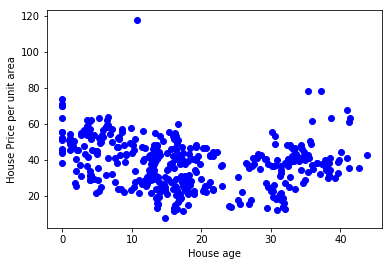

In [24]:
plt.scatter(cdf.House_age, cdf.House_ppa, color='blue')
plt.xlabel('House age')
plt.ylabel('House Price per unit area')
plt.show()

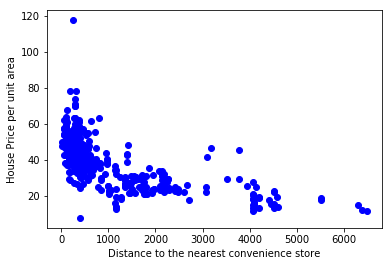

In [25]:
plt.scatter(cdf.Dist_nearest, cdf.House_ppa, color='blue')
plt.xlabel('Distance to the nearest convenience store')
plt.ylabel('House Price per unit area')
plt.show()

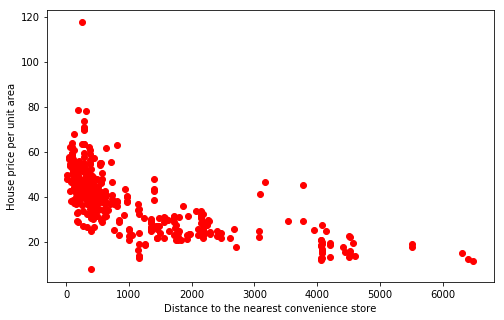

In [26]:
plt.figure(figsize=(8,5))
x_data, y_data = (df['Dist_nearest'].values, df['House_ppa'].values)
plt.plot(x_data, y_data, 'ro')
plt.xlabel('Distance to the nearest convenience store')
plt.ylabel('House price per unit area')
plt.show()

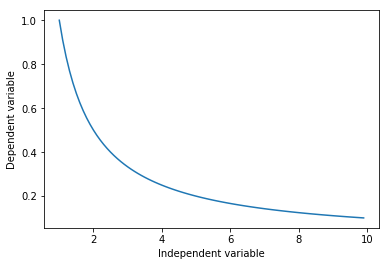

In [27]:
X = np.arange(1.0, 10.0, 0.1)
Y = 1.0 / X

plt.plot(X, Y)
plt.xlabel('Independent variable')
plt.ylabel('Dependent variable')
plt.show()

In [28]:
def reciprocal( x, m, c):
    y = 1 / (m*x+c)
    return y

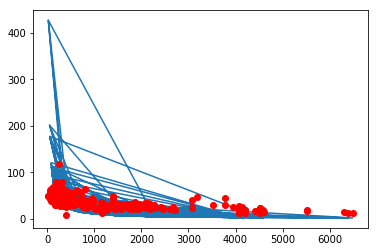

In [29]:
m = 10
c = 0.1

Y_pred = reciprocal(x_data, m, c)

plt.plot(x_data, Y_pred*100000)
plt.plot(x_data, y_data, 'ro')

In [30]:
# Let's normalize our data

xdata = x_data / max(x_data)
ydata = y_data / max(y_data)

In [31]:
# Finding the optimized parameters

from scipy.optimize import curve_fit
popt, pcov = curve_fit(reciprocal, xdata, ydata)
print(" M value = %f" % popt[0], popt[1])

 M value = 7.591327 2.2218699290085806


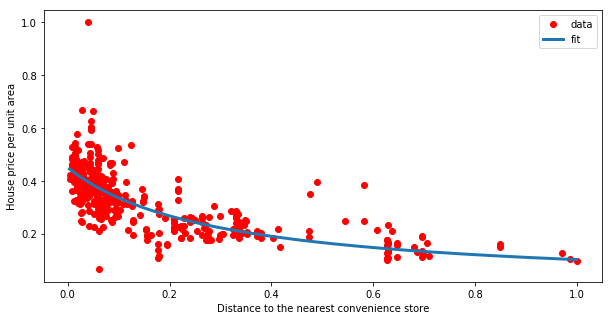

In [32]:
# Let's plot our resulting regression model

x = np.linspace(20, 6000, 1000)
x = x / max(x)
plt.figure(figsize=(10,5))
y = reciprocal(x, *popt)

plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.xlabel("Distance to the nearest convenience store")
plt.ylabel("House price per unit area")
plt.show()

In [33]:
#msk = np.random.rand(len(df)) < 0.8
#train_x = xdata[msk]
#train_y = ydata [msk]
#test_x = xdata[~msk]
#test_y = ydata[~msk]

from sklearn.model_selection import KFold
kfold = KFold(10, True, 1)
for trainx, testx in kfold.split(xdata):
    print("%s %s" % (trainx, testx))
for trainy, testy in kfold.split(ydata):
    print("%s %s" % (trainy, testy))
    
train_x = xdata[trainx]
train_y = ydata[trainy]
test_x = xdata[testx]
test_y = ydata[testy]
    
popt, pcov = curve_fit(reciprocal, train_x, train_y)

y_hat = reciprocal(test_x, *popt)

print("Mean absolute error: %.2f " % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f " % np.mean((y_hat-test_y)**2))
from sklearn.metrics import r2_score
print("R2-score : %.2f" % r2_score(y_hat, test_y))

[  0   1   2   3   7   8   9  10  11  12  13  14  15  16  18  19  20  21
  22  23  24  25  26  27  28  30  31  32  33  34  35  36  37  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  59
  60  61  63  64  65  66  68  69  70  71  72  73  74  75  76  77  78  79
  82  83  84  85  86  87  88  89  91  94  95  96  97  98  99 100 101 103
 104 105 107 108 109 110 111 112 113 114 115 116 118 119 120 121 123 124
 125 126 127 128 129 130 131 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 188 190 191 192 193 194 195 196 197 198 199 200 201
 202 203 205 206 208 209 210 212 213 215 216 217 218 219 220 221 222 224
 225 226 227 228 229 230 231 233 234 235 236 237 238 239 240 241 243 244
 245 246 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263
 264 265 266 267 268 269 270 271 272 273 274 275 27